<a href="https://colab.research.google.com/github/Sompote/pile_deep_learning/blob/main/GAN%C2%A0_pile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow_gan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 18.2 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import numpy
from numpy import hstack
import numpy as np
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras import Input
from keras.layers import Dense,LSTM
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df = pd.read_excel("/content/pile.xlsx", usecols=[0, 1], names=["X", "Y"])

x_data_real = np.array(df.values)
scaler = MinMaxScaler()
x_data_real = scaler.fit_transform(x_data_real)
n=x_data_real.shape[0]
y_data_real = np.ones((n, 1))


x_data_real.shape

(12, 2)

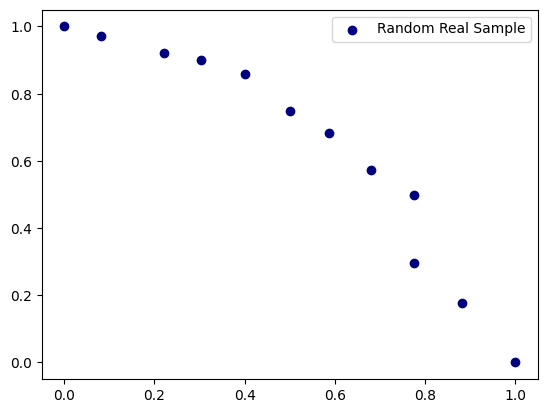

In [8]:
plt.scatter(x_data_real[:,0],x_data_real[:,1],label = 'Random Real Sample',color='navy')
plt.legend(fontsize=10)
plt.show()

In [4]:
x_data_real.shape

(12, 2)

In [15]:
import tensorflow as tf
import tensorflow_gan as tfgan
def generator_loss_fn(discriminator, generated_samples):
    return tfgan.losses.minimax_generator_loss(discriminator, generated_samples)
# Define your optimizer(s) for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

def train_step(real_samples):
    # Generate fake samples from the generator
    fake_samples = gan_model.generator(tf.random.normal([batch_size, latent_dim]))

    # Compute the generator loss
    with tf.GradientTape() as tape:
        generator_loss = generator_loss_fn(gan_model.discriminator, fake_samples)
    generator_gradients = tape.gradient(generator_loss, gan_model.generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(generator_gradients, gan_model.generator.trainable_variables))


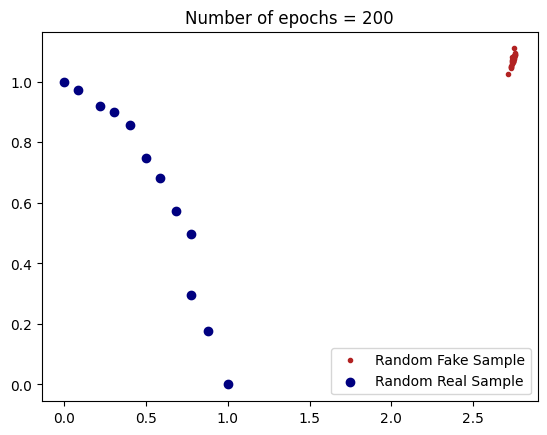

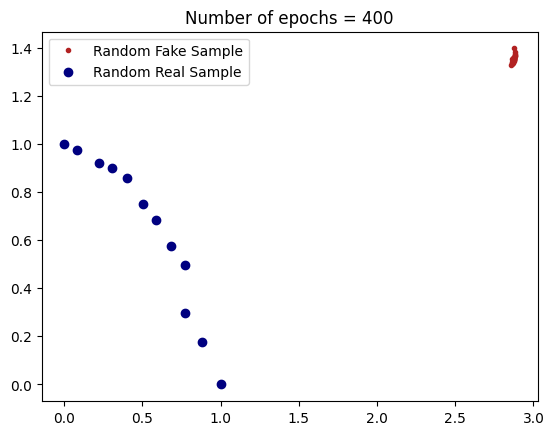

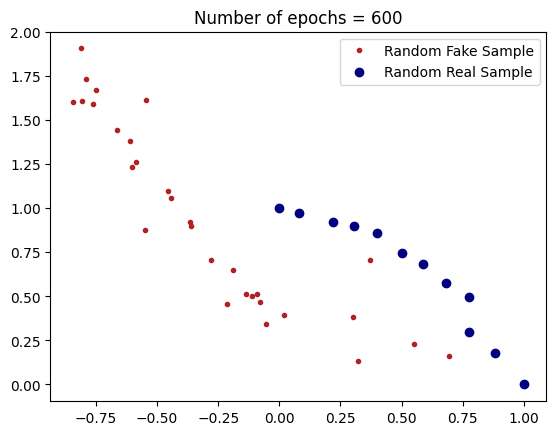

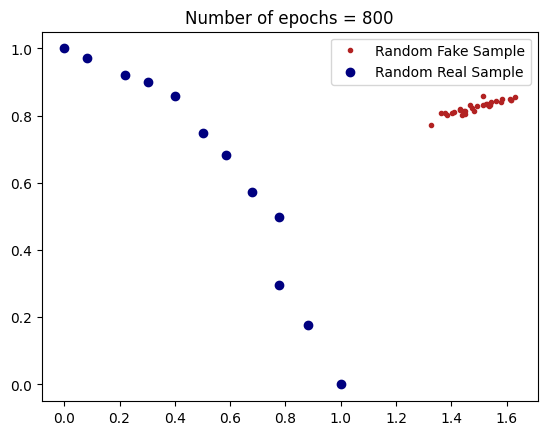

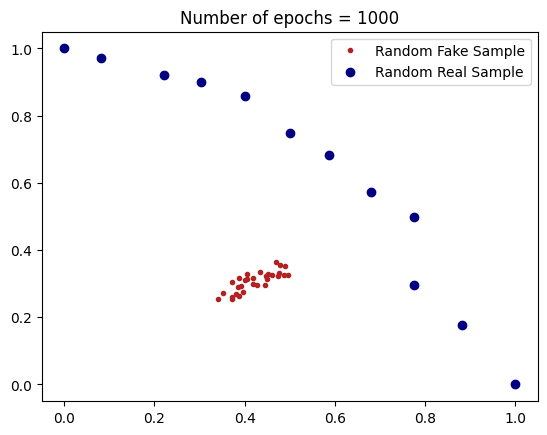

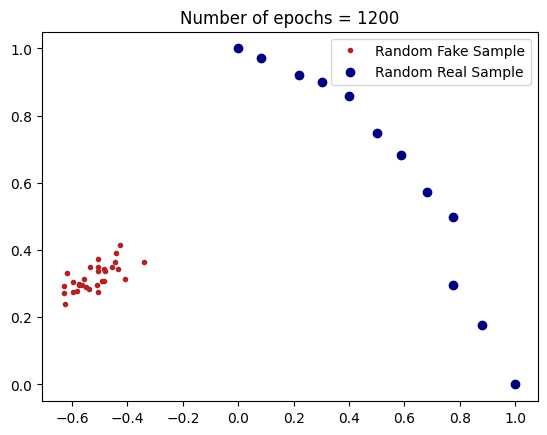

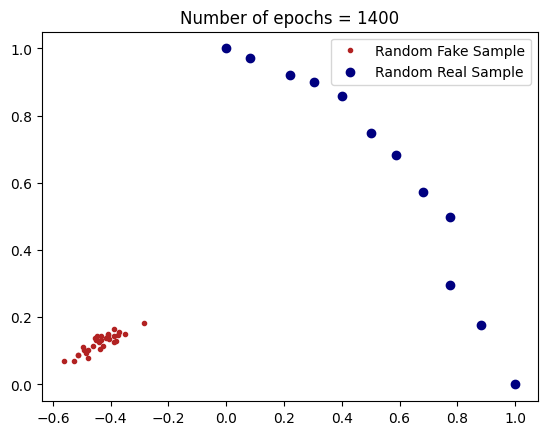

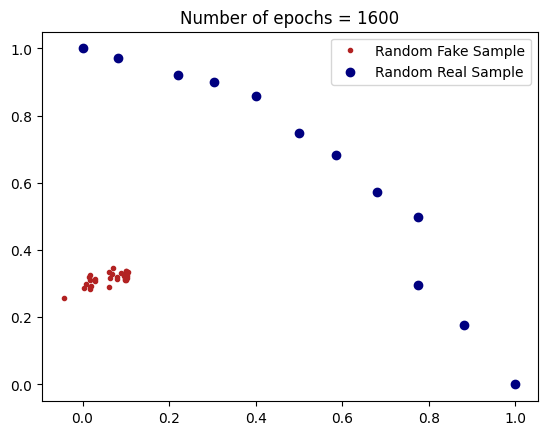

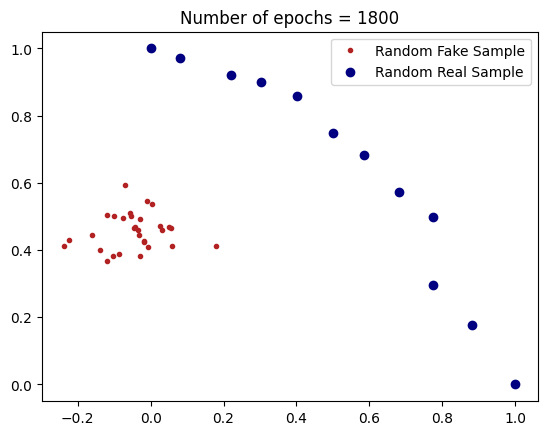

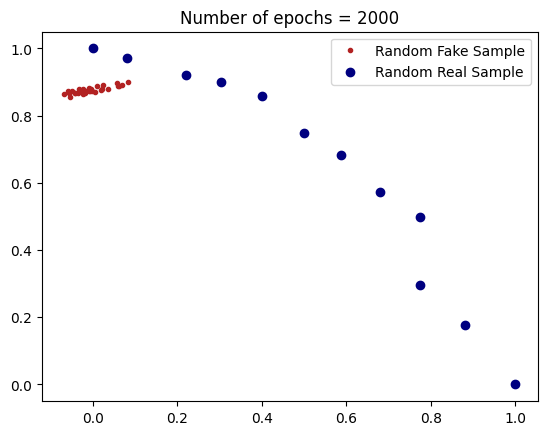

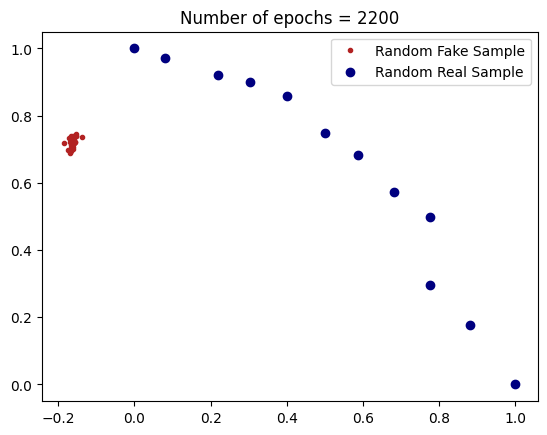

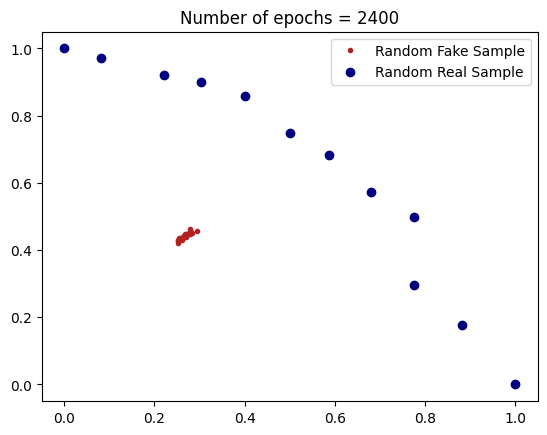

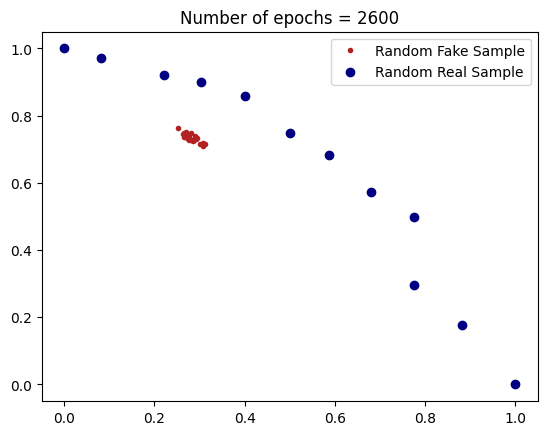

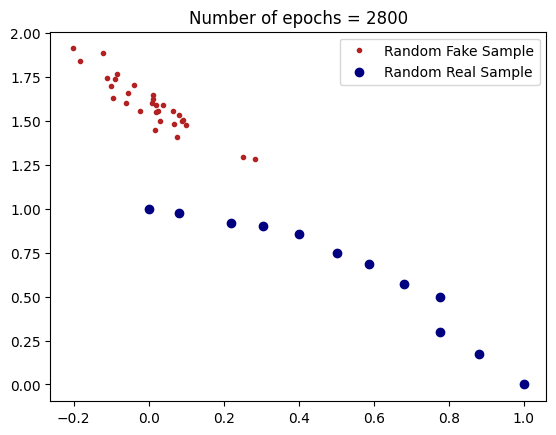

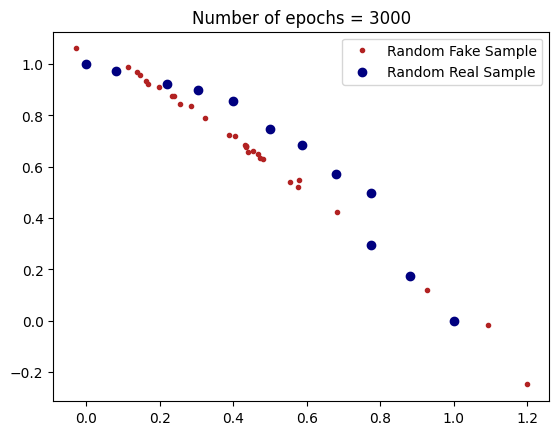

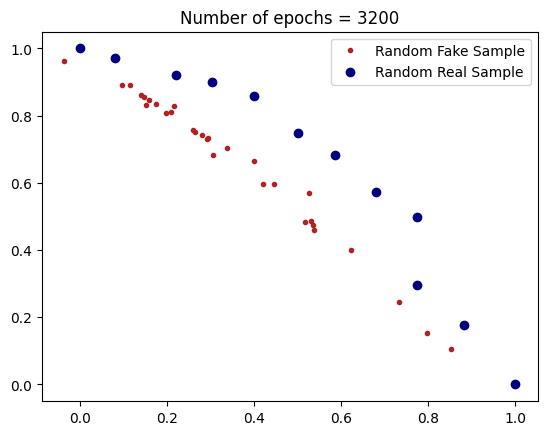

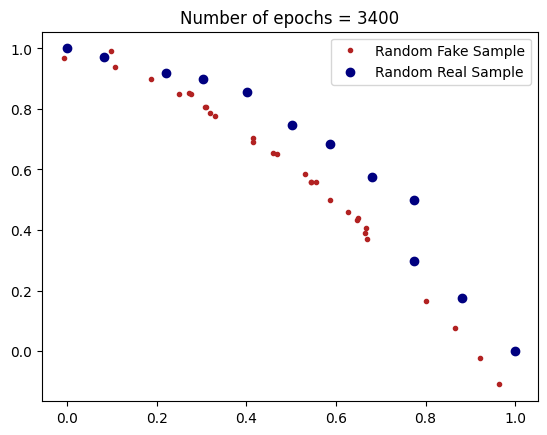

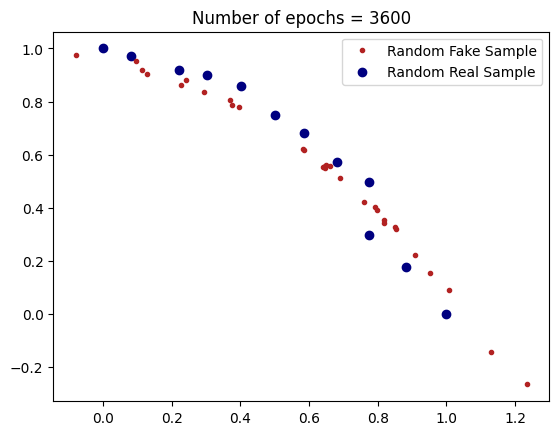

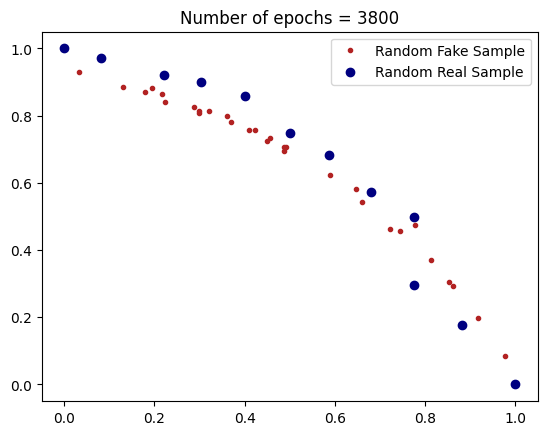

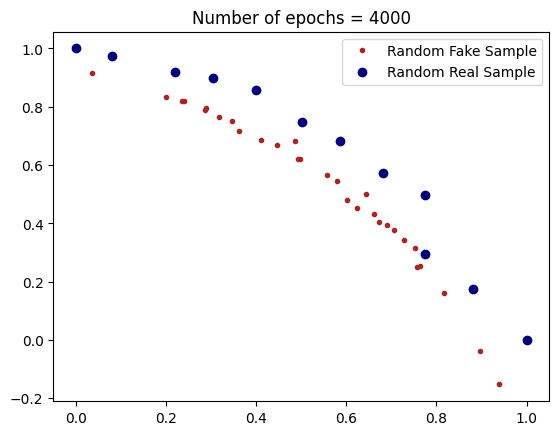

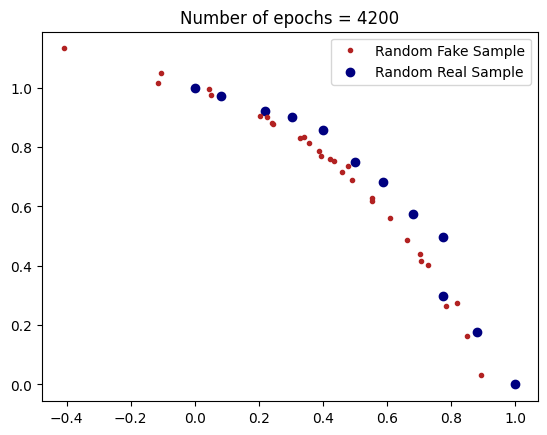

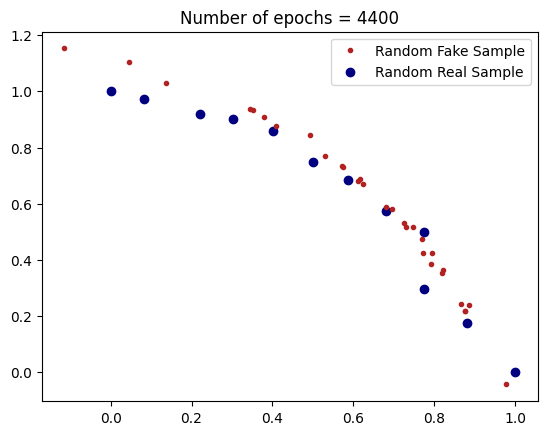

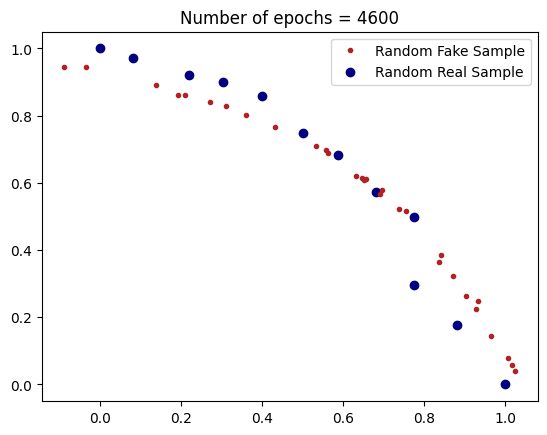

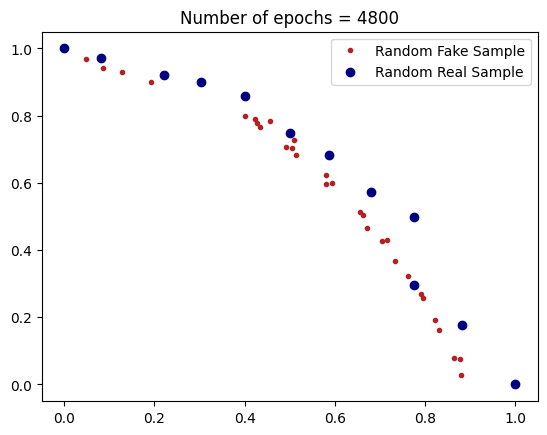

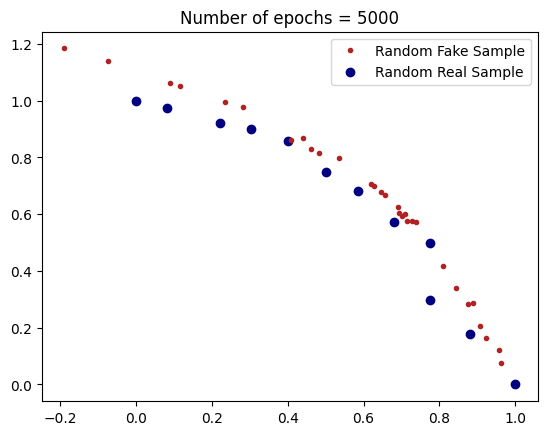

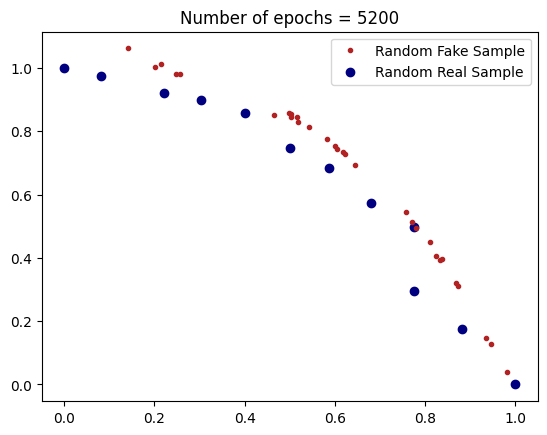

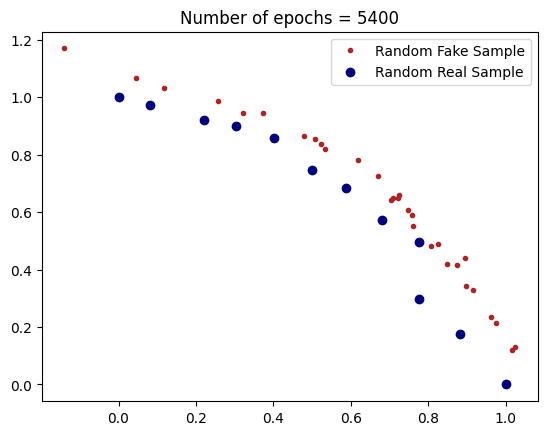

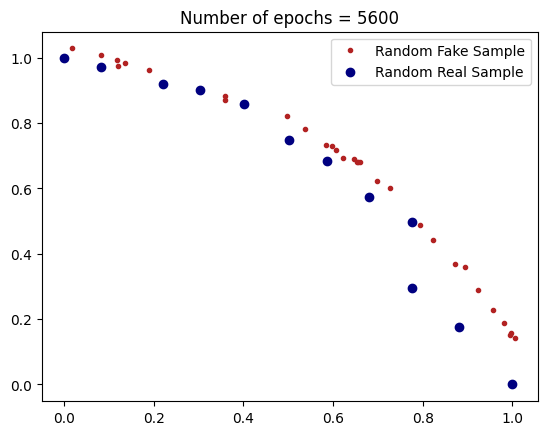

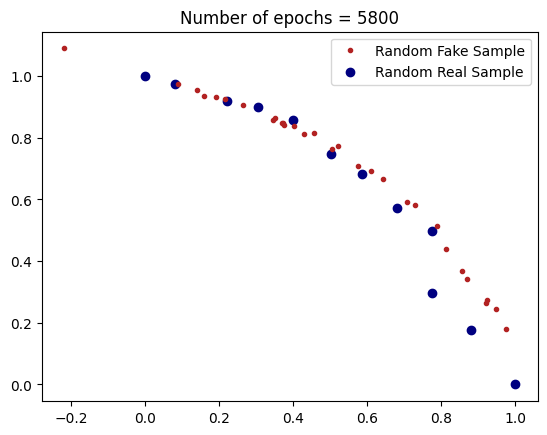

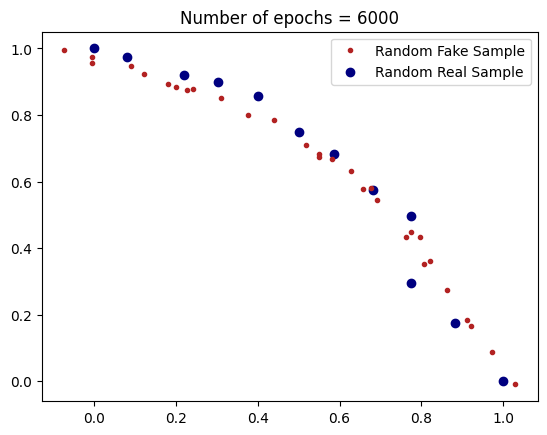

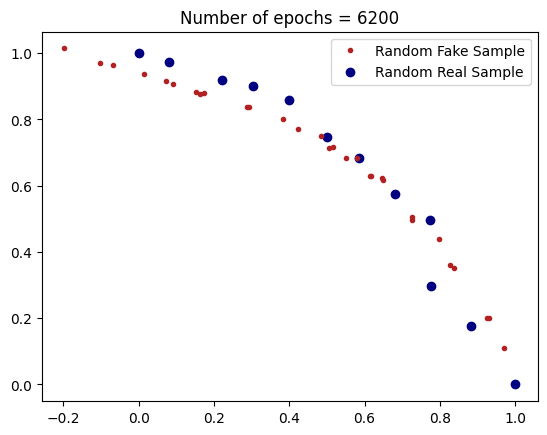

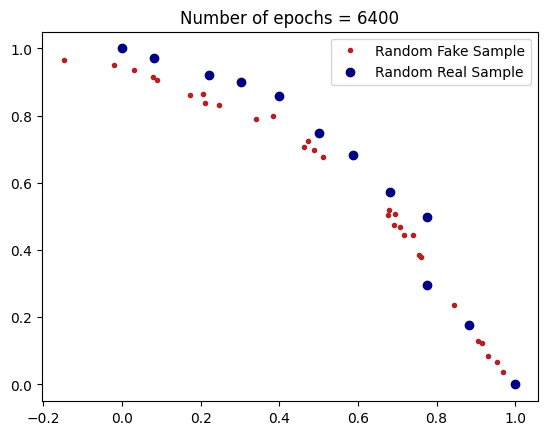

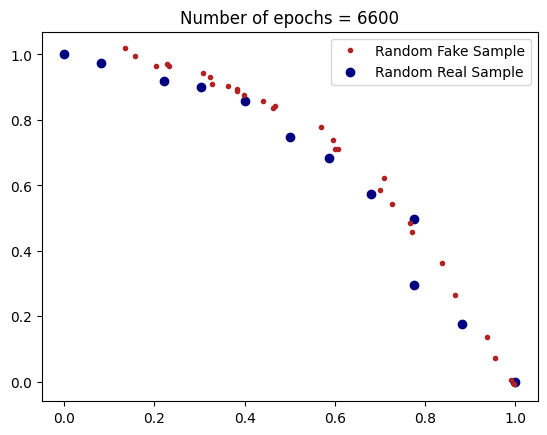

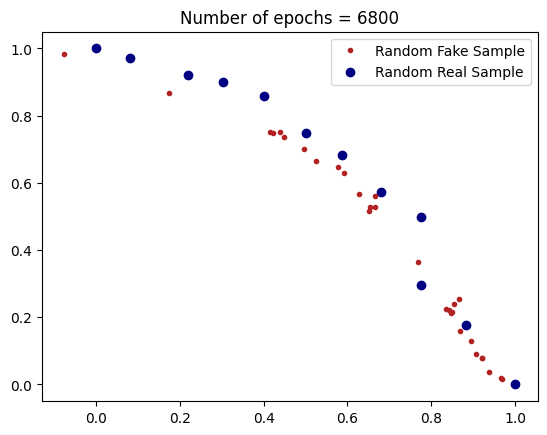

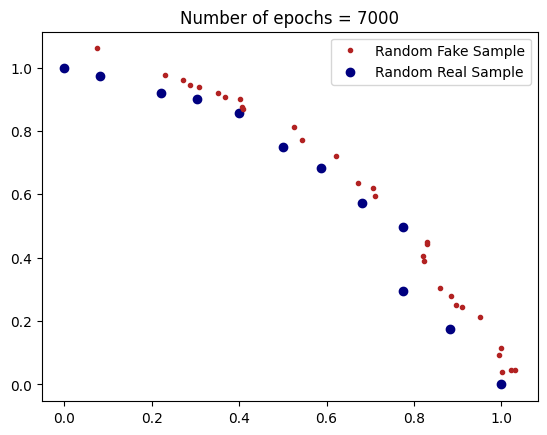

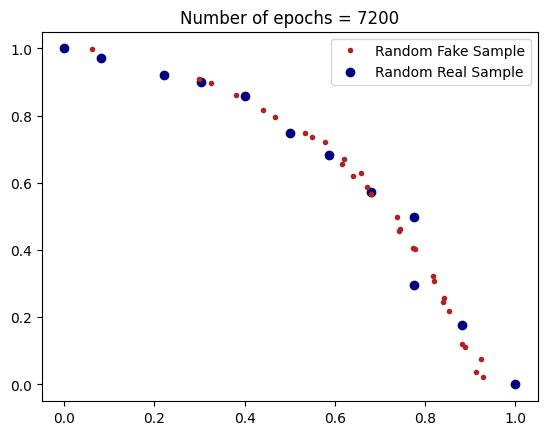

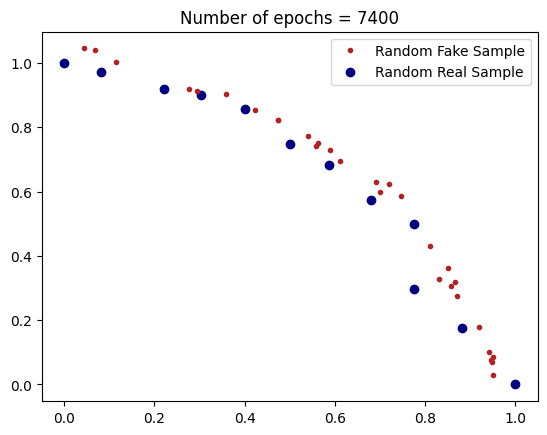

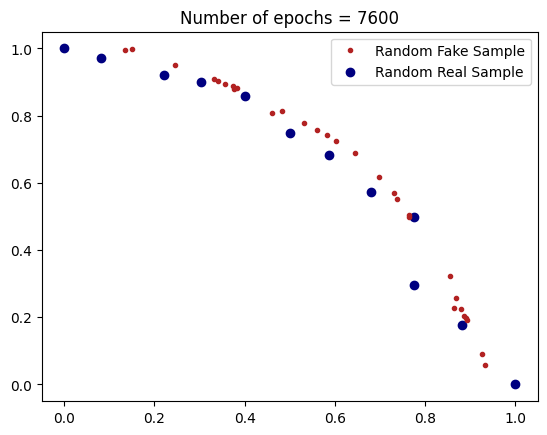

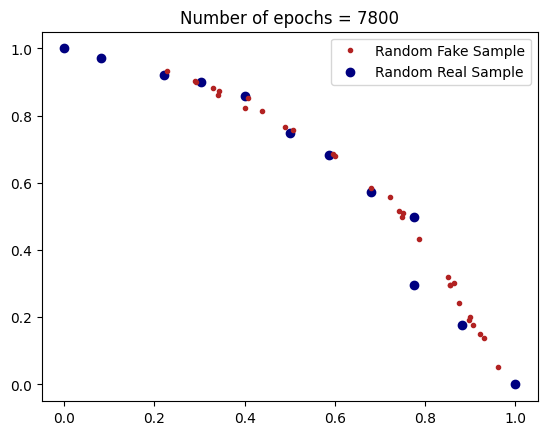

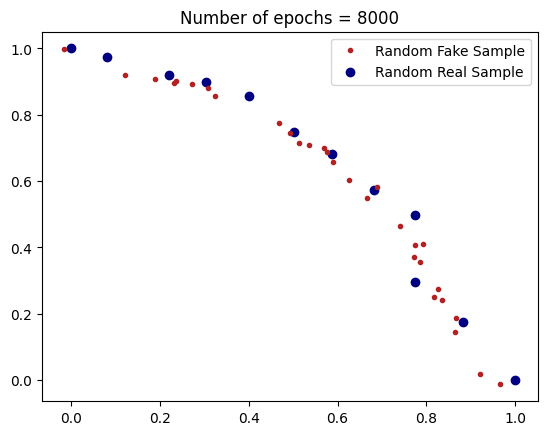

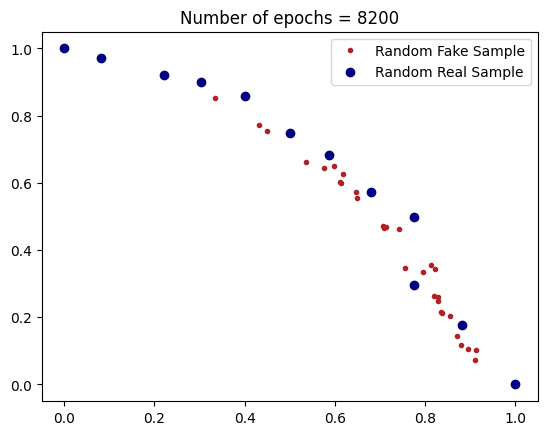

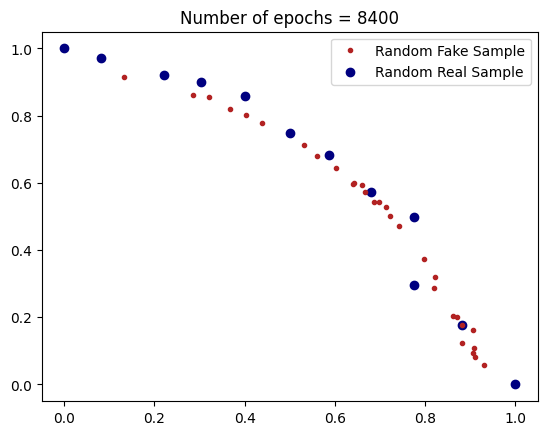

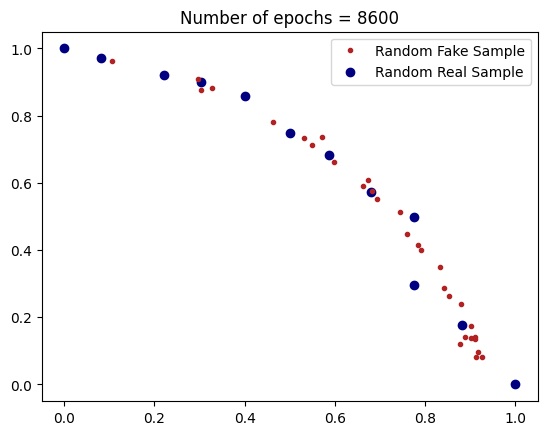

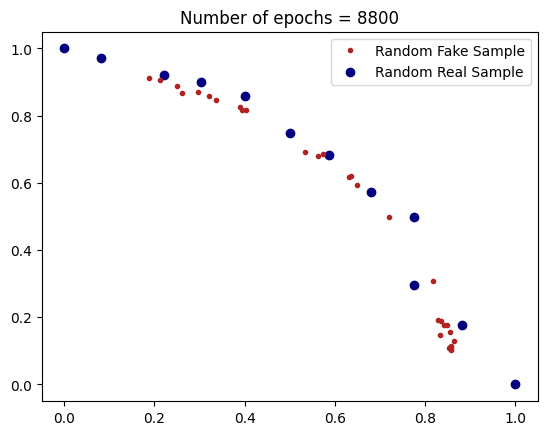

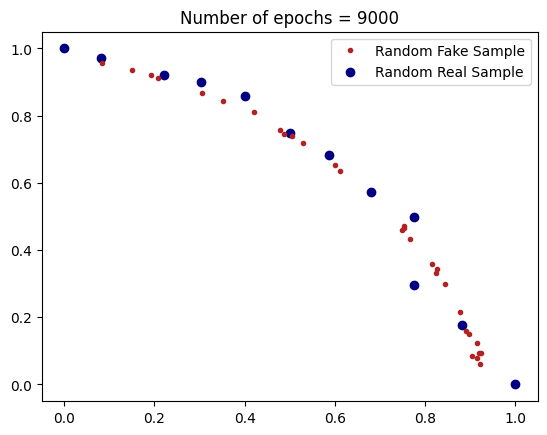

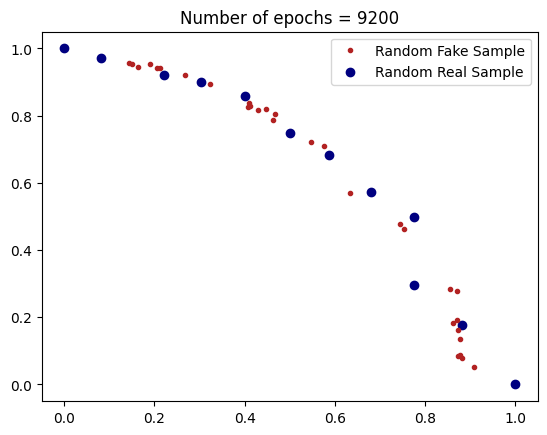

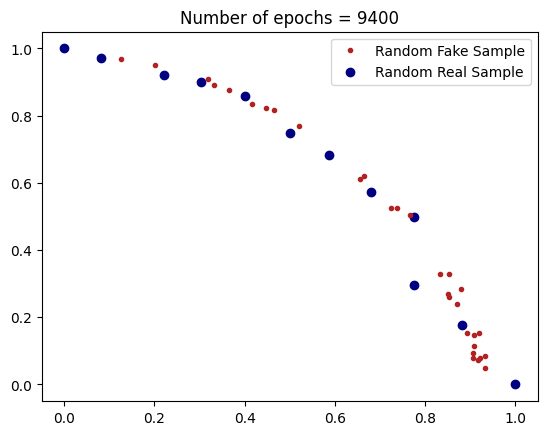

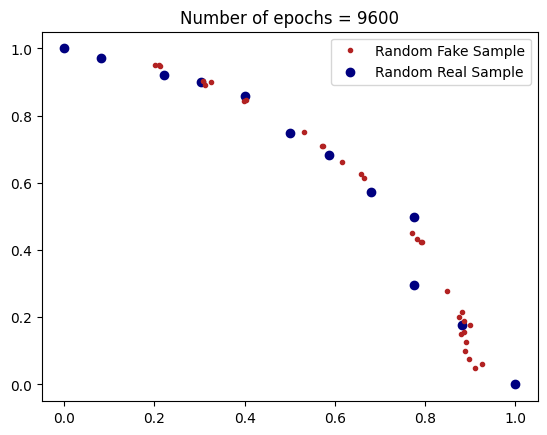

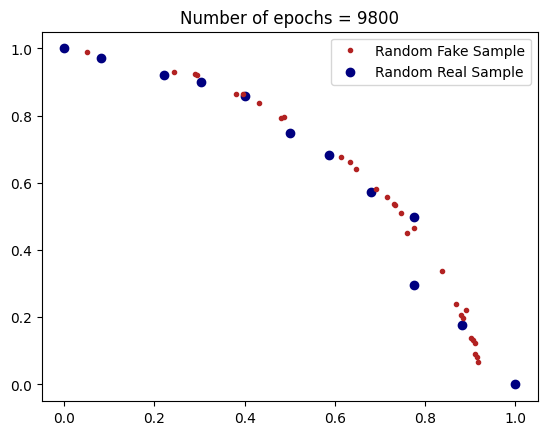

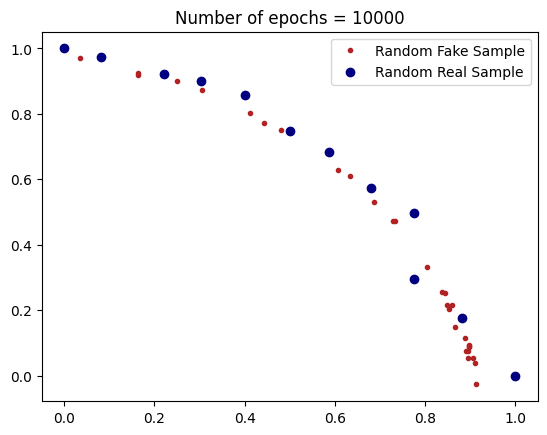

In [19]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
import numpy as np
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras import Input
from keras.layers import Dense,LSTM
from matplotlib import pyplot
import matplotlib.pyplot as plt

LENGTH_INPUT_real = x_data_real.shape[1]
LENGTH_INPUT =x_data_real.shape[1]
generator_loss_fn = tfgan.losses.minimax_generator_loss

# define the standalone discriminator model
def define_discriminator(n_inputs=LENGTH_INPUT_real):
    model = Sequential()
    model.add(Dense(n_inputs, activation='relu', input_dim=n_inputs))
    model.add(Dense(500, activation='relu', input_dim=n_inputs))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=LENGTH_INPUT):
    model = Sequential()
    model.add(Input(shape=(latent_dim, 1)))
    model.add(LSTM(100))



    model.add(Dense(LENGTH_INPUT, activation='linear'))
    model.compile(loss='generator_loss_fn', optimizer='adam', metrics=['mean_absolute_error'])

    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# generate n real samples with class labels
def generate_real_samples(n):
    amps = np.arange(0.1,10,0.1)
    bias = np.arange(0.1,10,0.1)
    freqs = np.linspace(1,2,1000)
    X2 = np.linspace(-5,5,LENGTH_INPUT)
    X1 = []
    for x in range(n):
        noise = np.random.normal(size=len(X2))
        X1.append(np.random.choice(amps)*np.sin(X2*np.random.choice(freqs))+np.random.choice(bias)+0.3*noise)
    X1 = np.array(X1).reshape(n, LENGTH_INPUT)
    # generate class labels
    y = ones((n, 1))
    return X1, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = generator.predict(x_input, verbose=0)
    # create class labels
    y = zeros((n, 1))
    #print(x_input)
    return X, y


# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=12, n_eval=200):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        #x_real, y_real = generate_real_samples(half_batch)
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminator
        d_model.train_on_batch(x_data_real, y_data_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            plt.title('Number of epochs = %i'%(i+1))
            pred_data = generate_fake_samples(generator,latent_dim,latent_dim)[0]
            #real_data  = generate_real_samples(latent_dim)[0]
            real_data= x_data_real
            plt.plot(pred_data[:,0],pred_data[:,1],'.',label='Random Fake Sample',color='firebrick')
            plt.scatter(x_data_real[:,0],x_data_real[:,1],label = 'Random Real Sample',color='navy')
            plt.legend(fontsize=10)
            plt.show()
# size of the latent space
latent_dim = 30
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

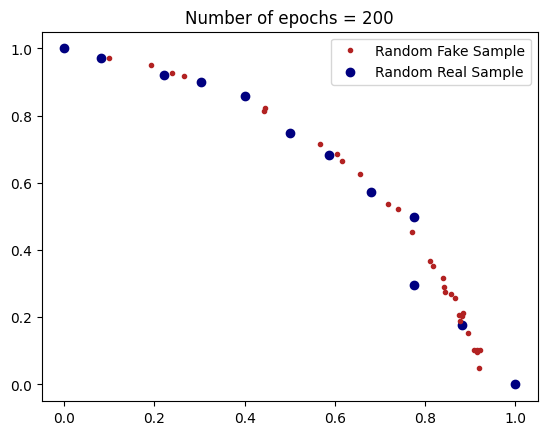

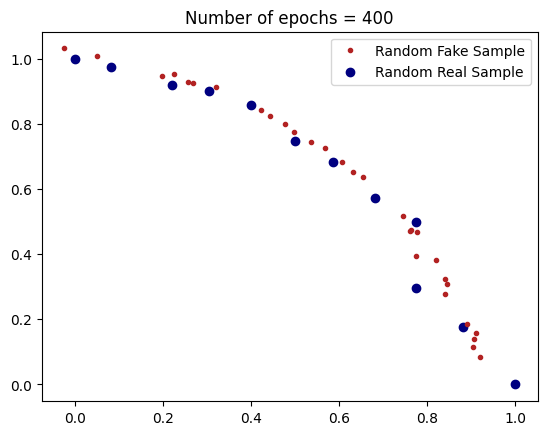

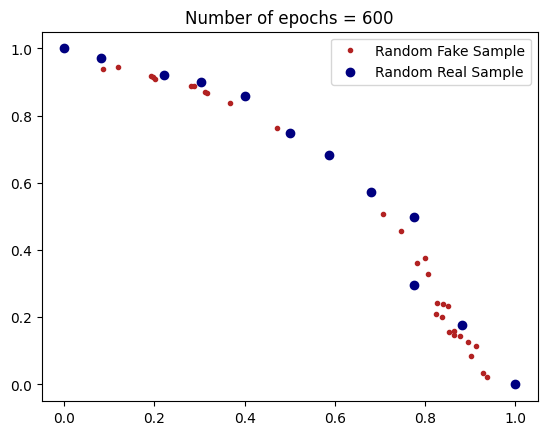

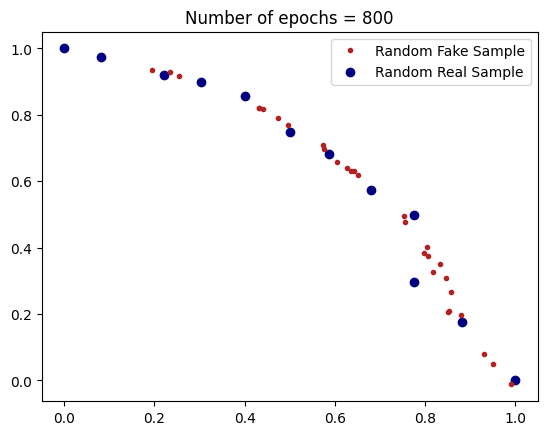

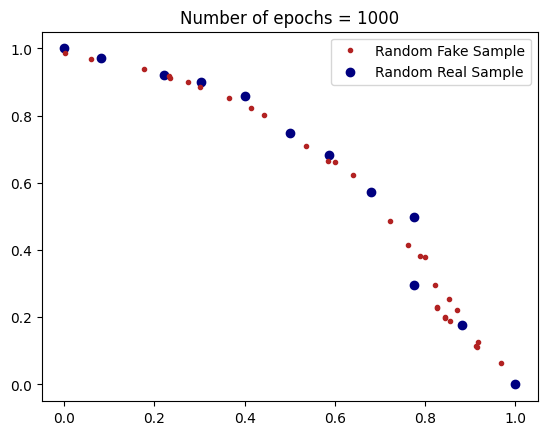

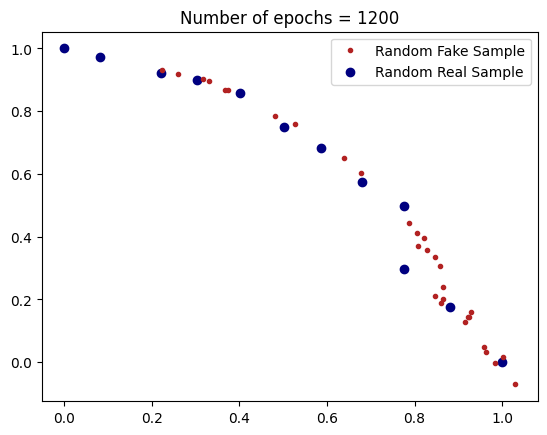

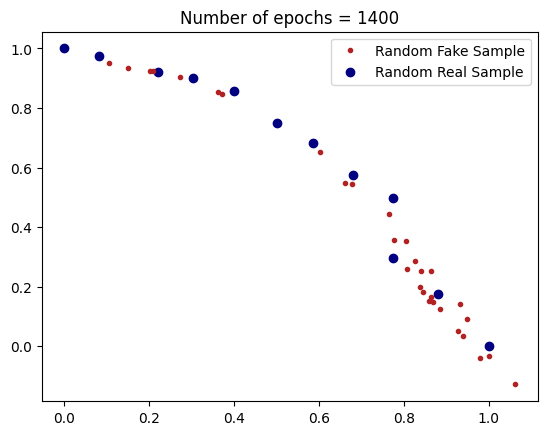

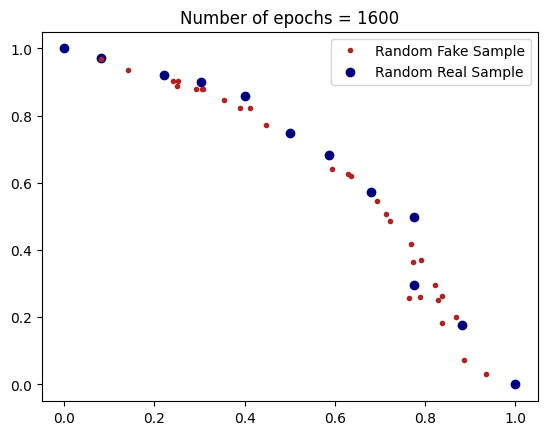

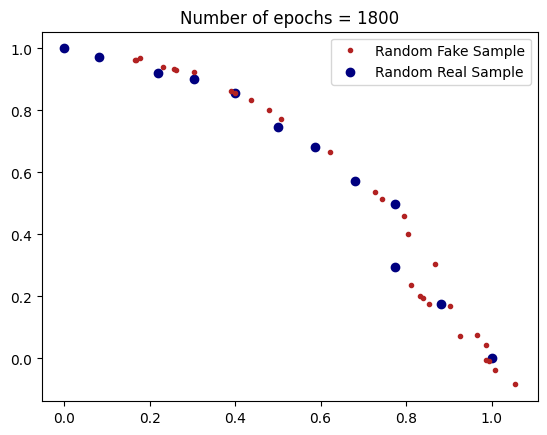

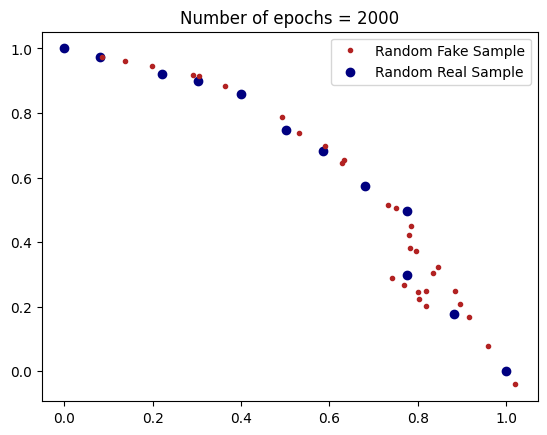

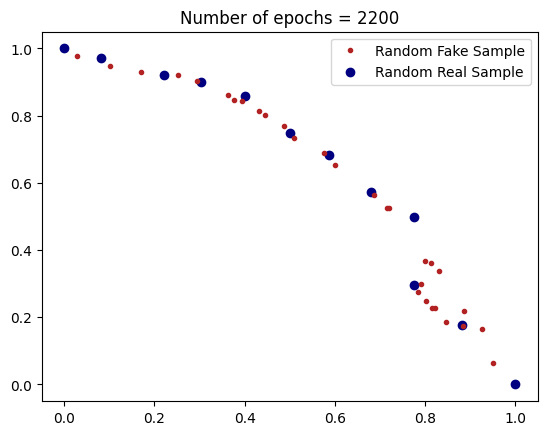

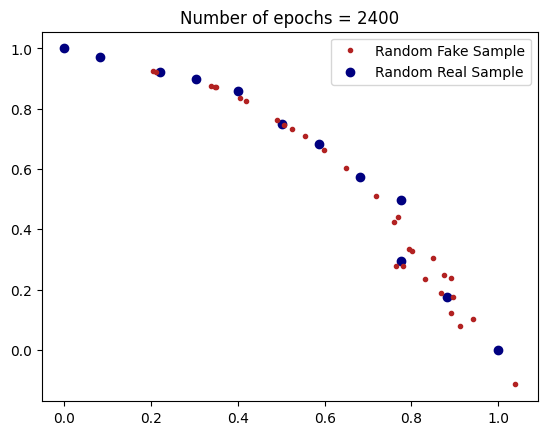

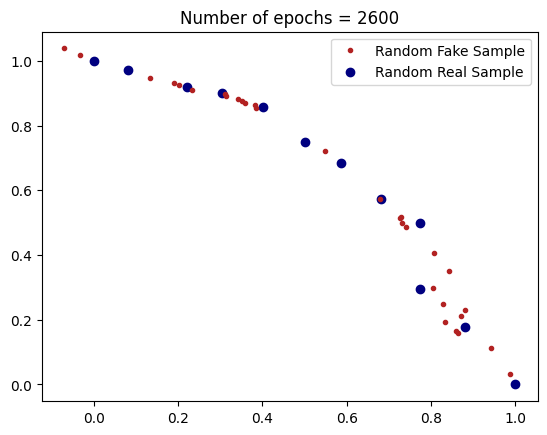

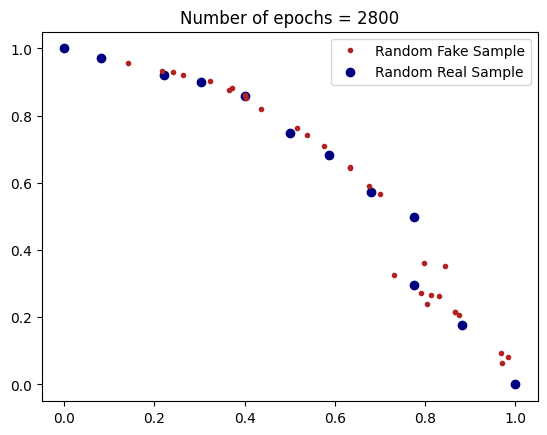

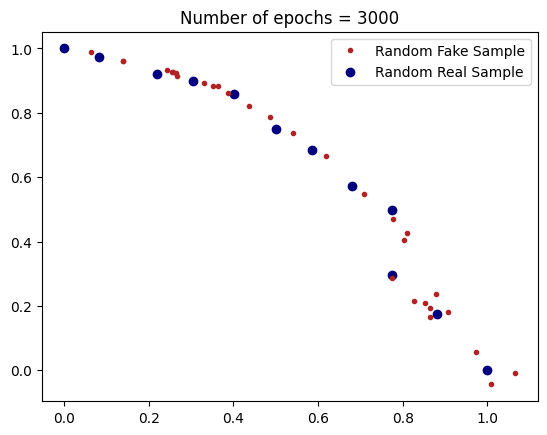

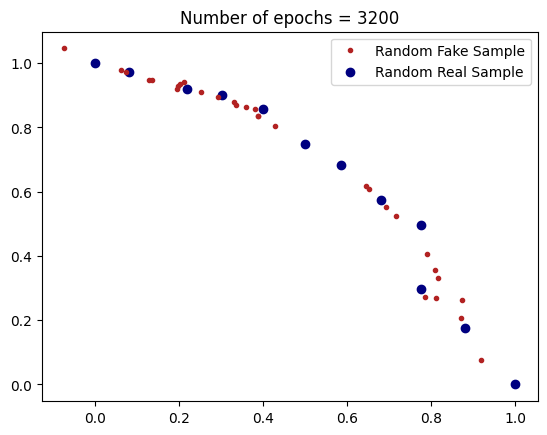

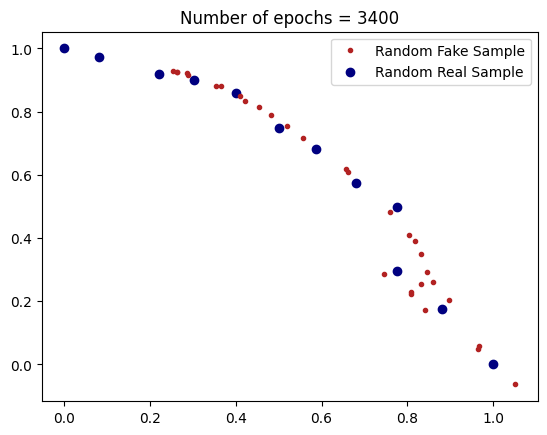

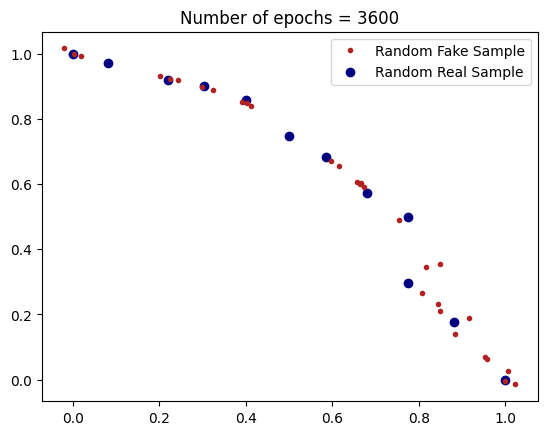

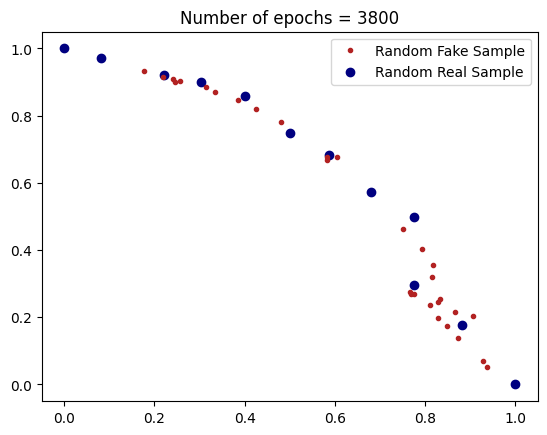

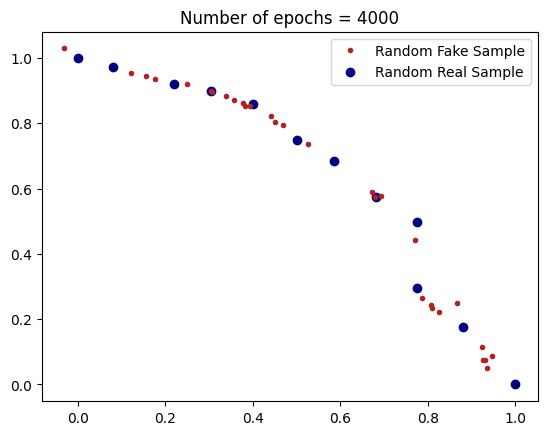

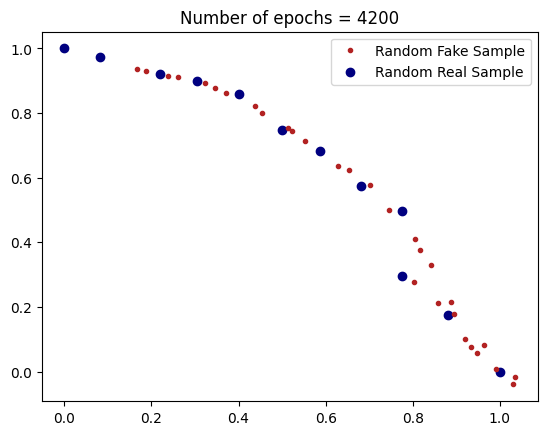

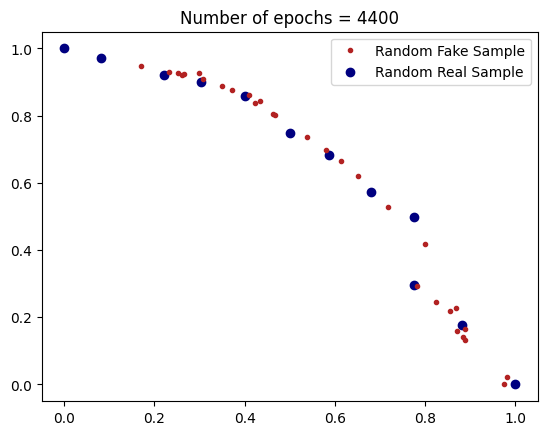

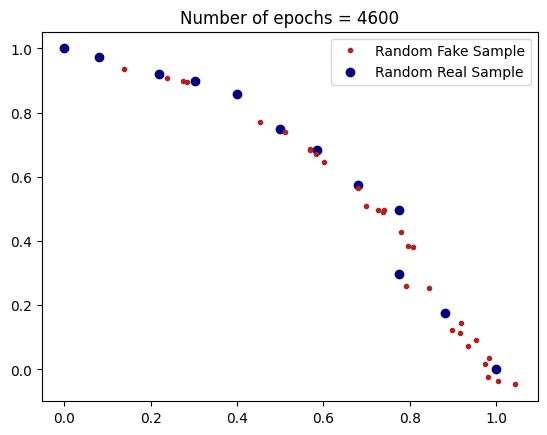

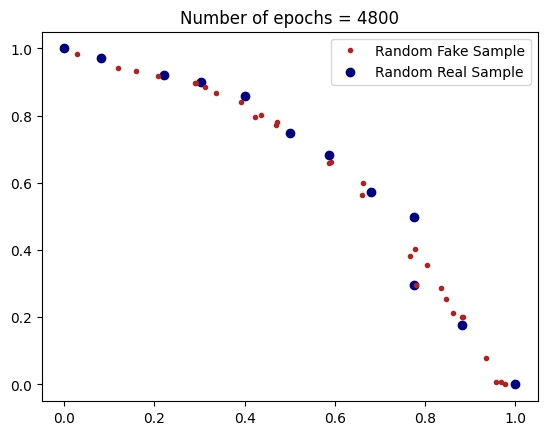

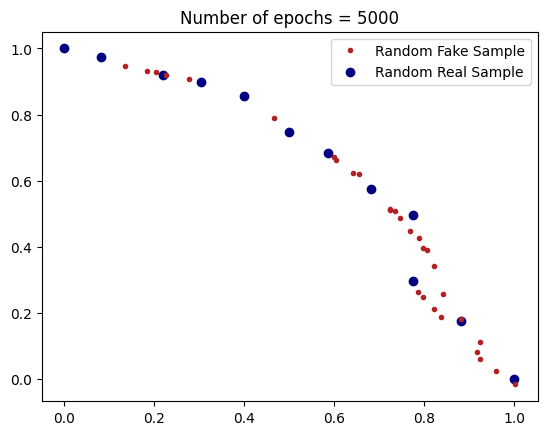

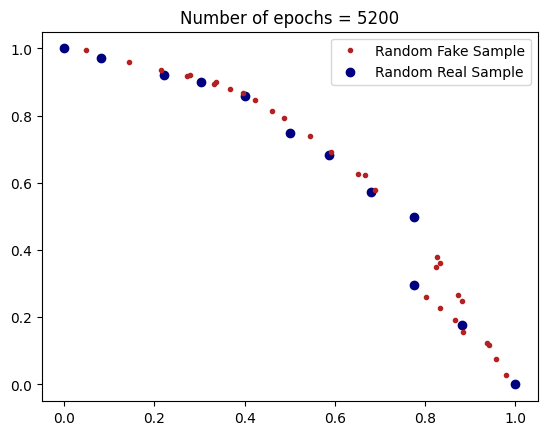

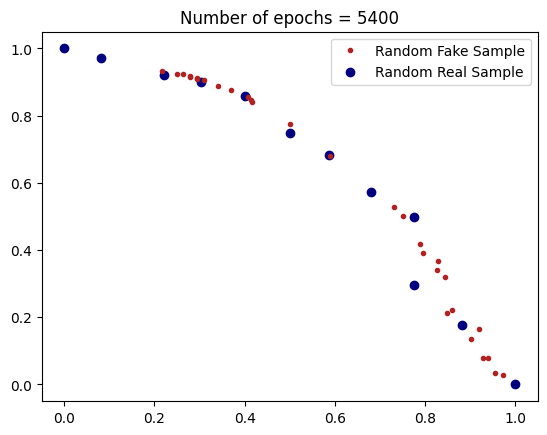

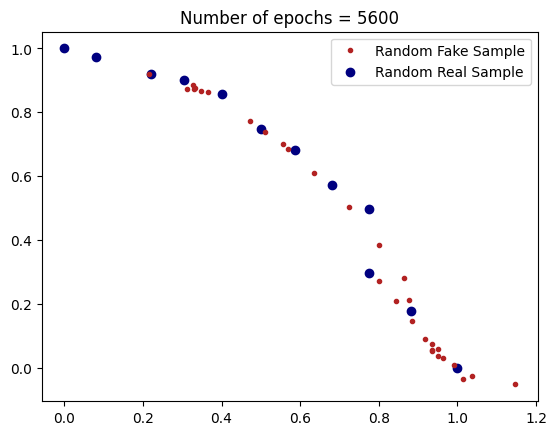

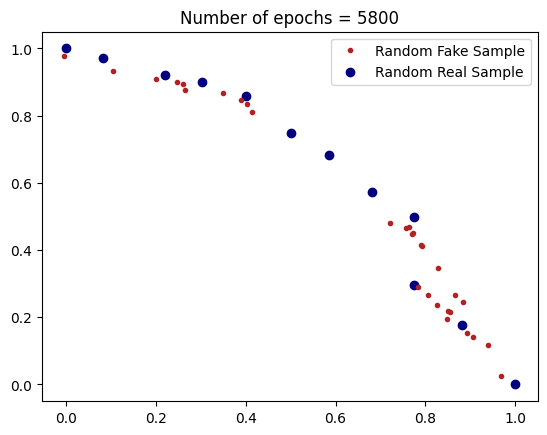

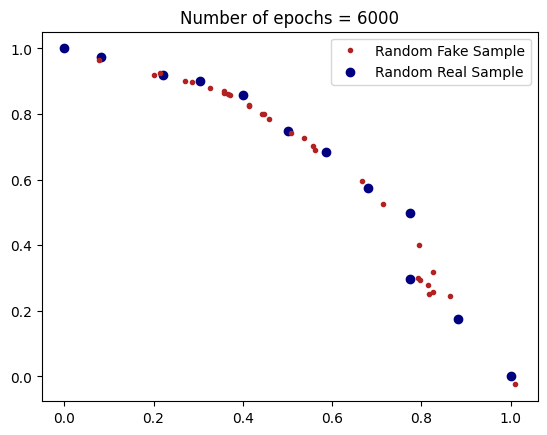

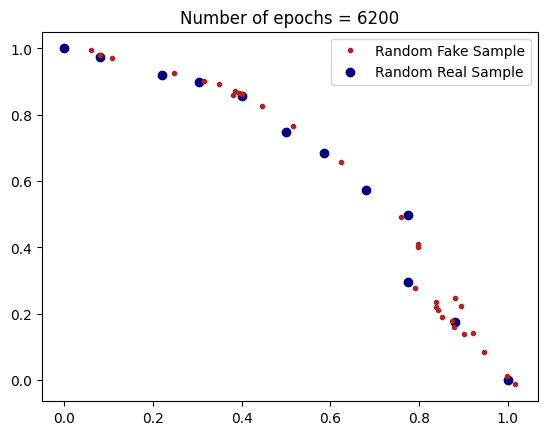

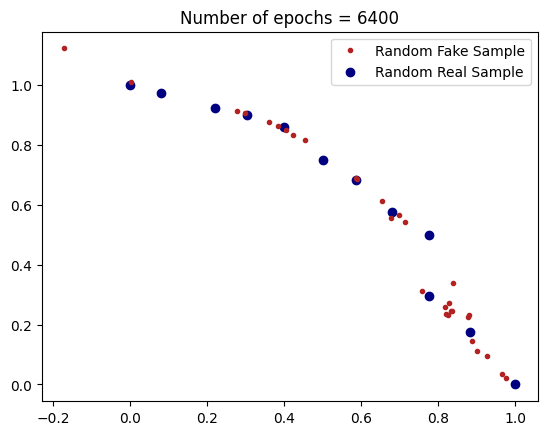

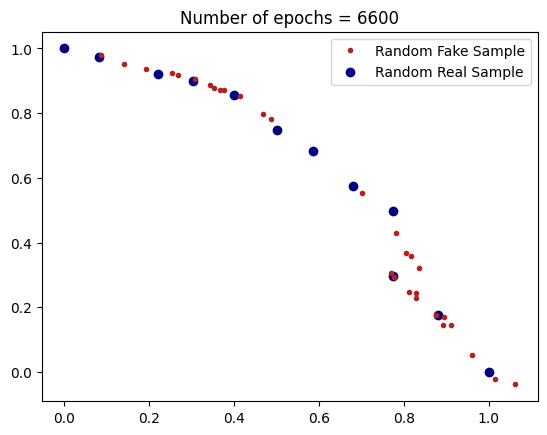

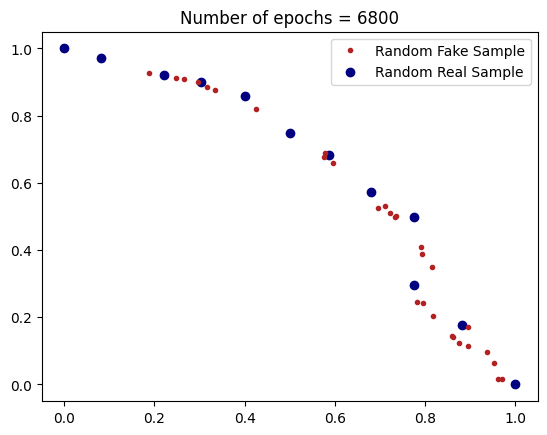

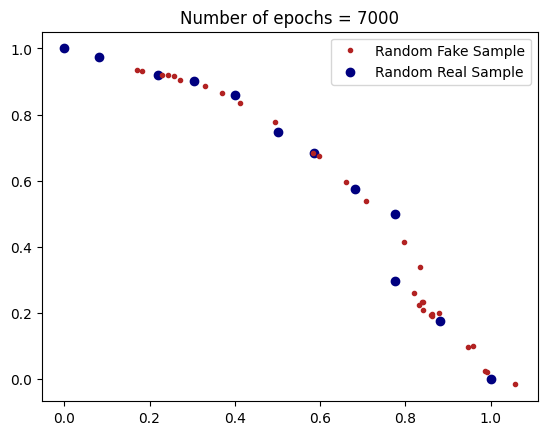

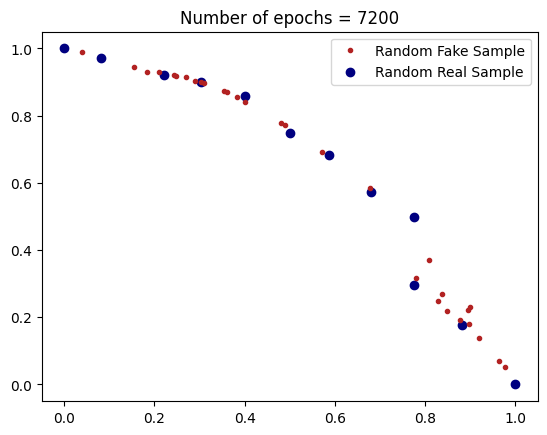

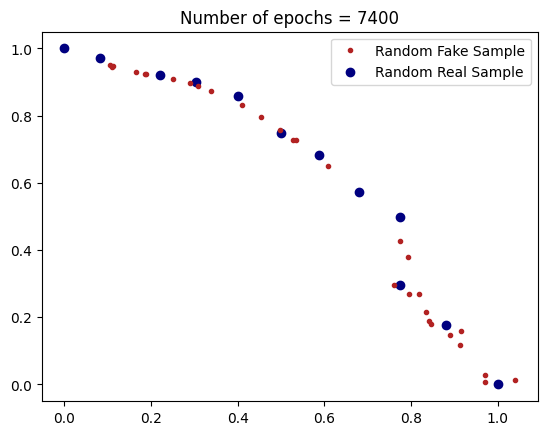

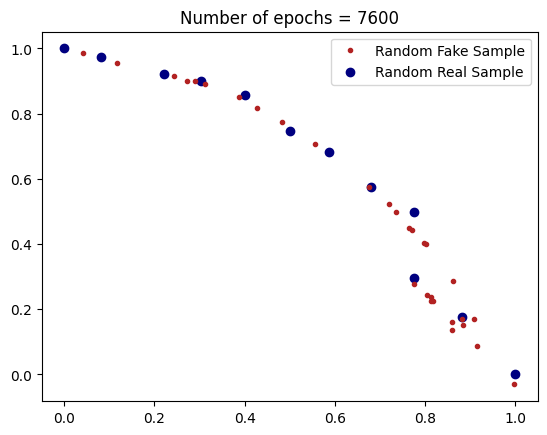

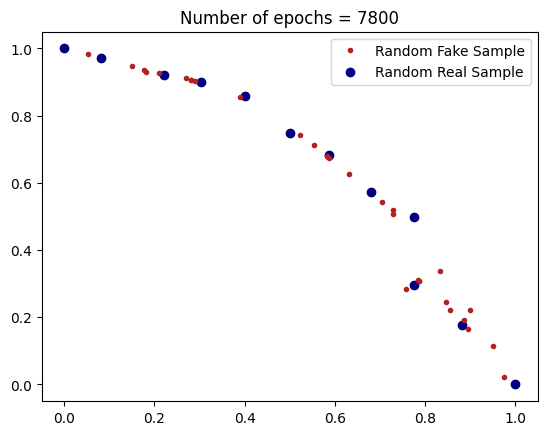

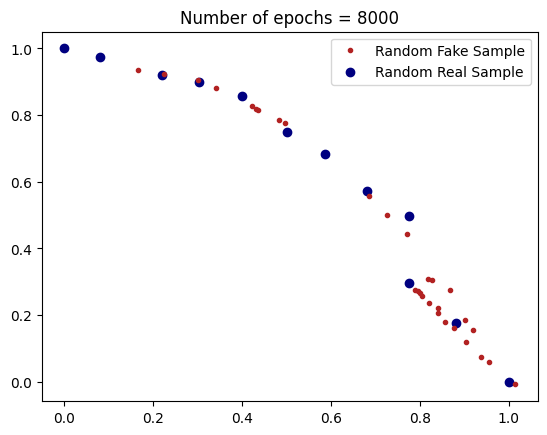

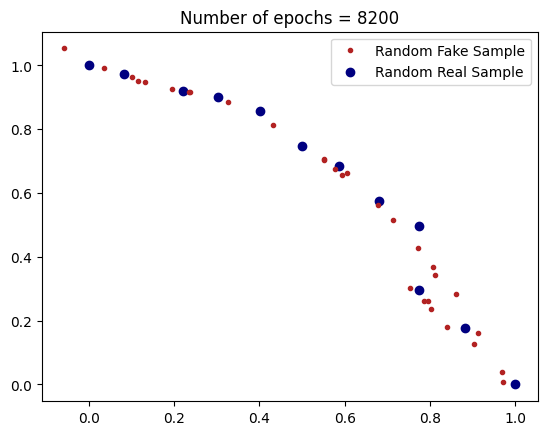

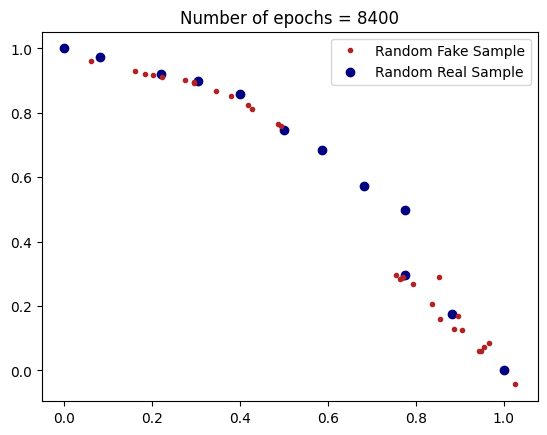

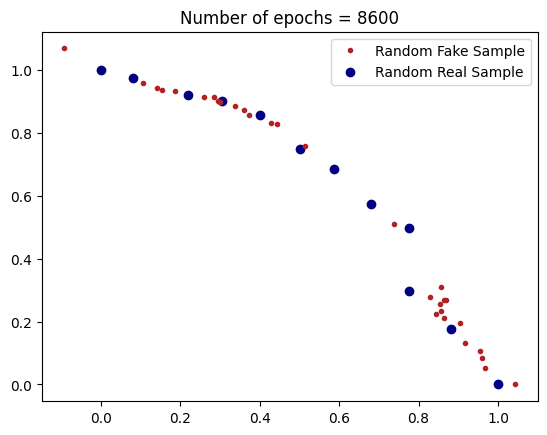

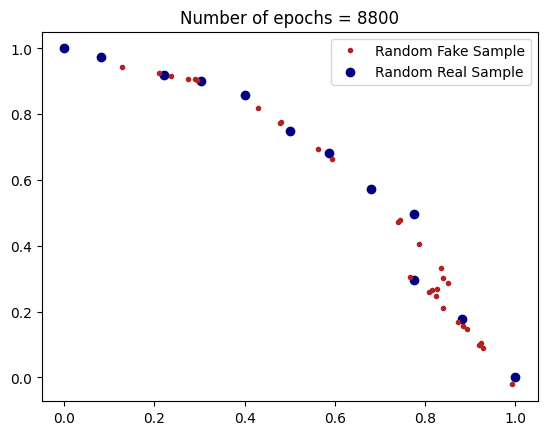

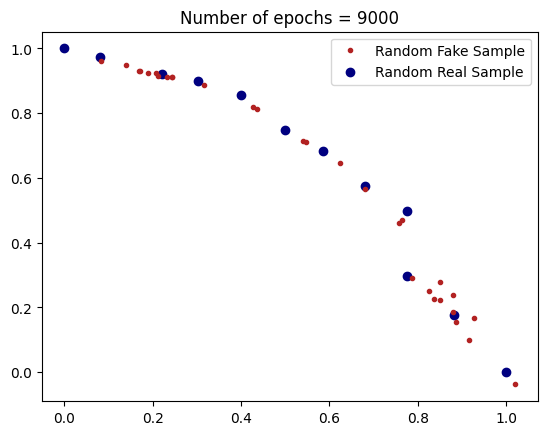

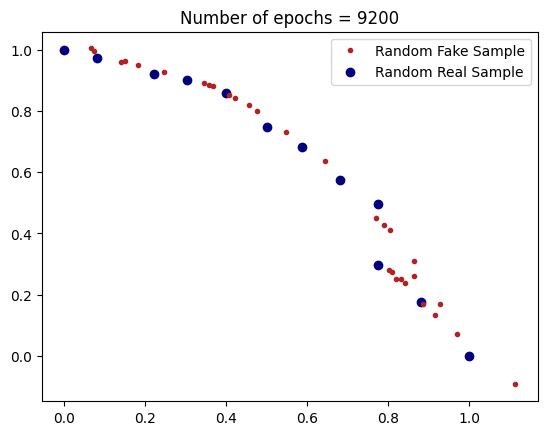

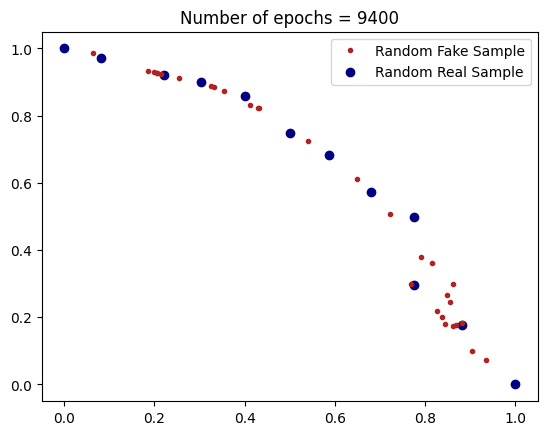

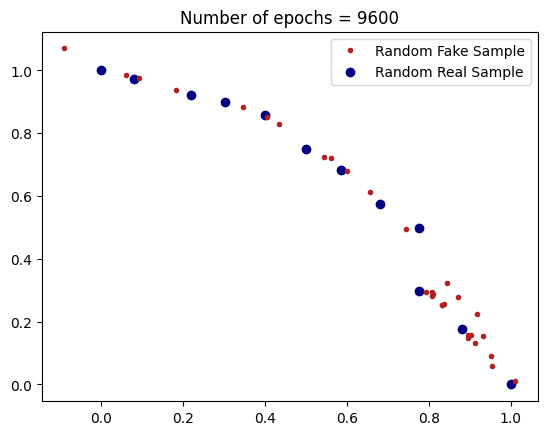

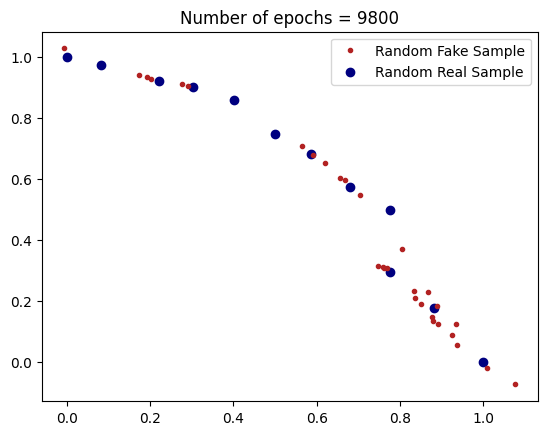

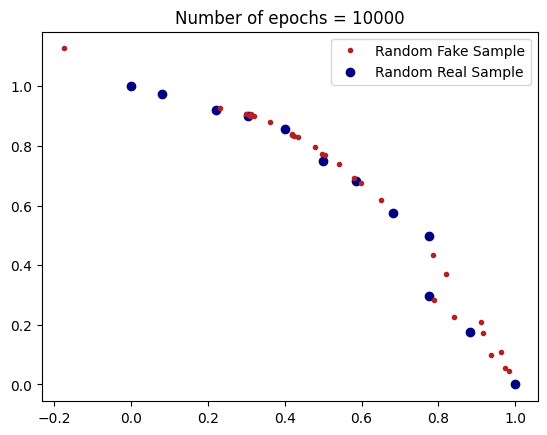

In [20]:
train(generator, discriminator, gan_model, latent_dim)

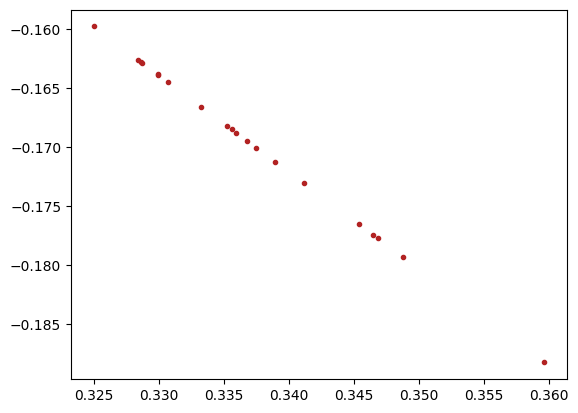

In [93]:
pred_data=generate_fake_samples(generator,latent_dim,latent_dim)[0]
plt.plot(pred_data[:,0],pred_data[:,1],'.',label='Random Fake Sample',color='firebrick')


In [10]:
generate_latent_points(latent_dim, n)

array([[ 0.7088612 ,  1.37253496, -0.84726362, ...,  0.4814617 ,
        -0.86111342,  0.34100038],
       [ 0.92985551,  0.51127476,  1.08520828, ...,  0.88065917,
         1.53348331, -0.64215392],
       [-0.84949204,  0.22900586,  0.61246002, ..., -0.03012969,
         0.60877503,  0.63813142],
       ...,
       [-1.03441023, -0.99259682,  0.78467267, ...,  1.07196495,
         1.26122114,  0.50098934],
       [-0.32145052, -1.40190046, -1.0057025 , ...,  0.26421188,
         1.22943472, -0.42918383],
       [-0.48487604, -0.31791122,  2.22241101, ...,  0.82256294,
         1.12801868, -0.7759051 ]])

In [ ]:

#try this demo with keras==2.2.4 and tensorflow==1.13.1:

from keras import Sequential, Model
from keras.layers import Embedding, GlobalAveragePooling1D, Dense, concatenate
import numpy as np

model1 = Sequential()
model1.add(Embedding(20, 10, trainable=True))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(1, activation='sigmoid'))
model2 = Sequential()
model2.add(Embedding(20, 10, trainable=True))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(1, activation='sigmoid'))

model_concat = concatenate([model1.output, model2.output], axis=-1)
model_concat = Dense(1, activation='softmax')(model_concat)
model = Model(inputs=[model1.input, model2.input], outputs=model_concat)

model.compile(loss='binary_crossentropy', optimizer='adam')

X_train_1 = np.random.randint(0, 20, (10000, 256))
X_train_2 = np.random.randint(0, 20, (10000, 256))
Y_train = np.random.randint(0, 2, 10000)

model.fit([X_train_1, X_train_2], Y_train, batch_size=1000, epochs=200,
              verbose=True)